<a href="https://colab.research.google.com/github/MeenaCherukuri/AIML-Internship/blob/main/29_5_25_AIML_Internship_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

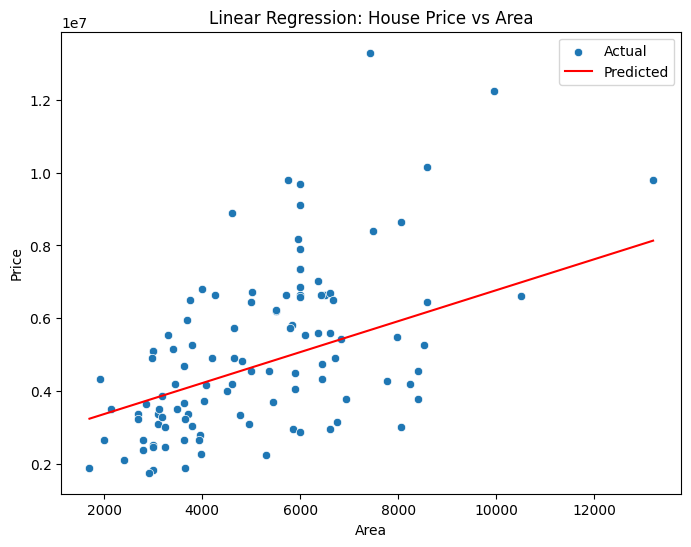


🧮 Model Coefficients:
Intercept: 2512254.26
Slope (Area): 425.73


In [3]:
# 🔧 Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 📥 Step 2: Load dataset (replace with local path if needed)
df = pd.read_csv("/content/Housing.csv")  # Replace with your actual file

# 👀 Quick look
print(df.head())
print(df.info())
print(df.describe())

# ✨ Optional: Drop non-numeric or irrelevant columns
df = df.select_dtypes(include=[np.number]).dropna()

# Print the columns after filtering to confirm available numeric columns
print("\nColumns after selecting numeric types:")
print(df.columns)

# 📊 Step 3: Feature & Target Selection
# Based on the global variable display, 'area' seems to be the numeric column
# representing the living area instead of 'GrLivArea'.
X = df[['area']]                # Simple Linear Regression - Changed to 'area'
# For multiple regression: X = df[['GrLivArea', 'GarageArea', 'OverallQual']]
y = df['price'] # Changed target to 'price' based on global variable display

# 📎 Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Step 5: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 📈 Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

# 🖼️ Step 7: Visualize Regression Line
plt.figure(figsize=(8, 6))
# Update x-axis data for scatterplot and lineplot to use the correct column name 'area'
sns.scatterplot(x=X_test['area'], y=y_test, label="Actual")
sns.lineplot(x=X_test['area'], y=y_pred, color='red', label="Predicted")
# Update labels
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: House Price vs Area")
plt.legend()
plt.show()

# 🧮 Step 8: Interpret Coefficients
print("\n🧮 Model Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
# Update the slope interpretation to the correct column name 'area'
print(f"Slope (Area): {model.coef_[0]:.2f}")